<center>Проект по курсу "Машинное обучение и анализ данных".</center>
<center>Выполнили студенты групп э521, э522:</center>
<center>Мигранов Ратмир, Мирхалилов Дониёр. </center>
<center>Преподаватель: </center>
<center>Шокуров Антон В.</center>

<center><h1>ПРОЕКТ</h1></center>

<h3>Импорт необходимых библиотек</h3>

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import scipy.optimize as opt

<h3>Загрузка данных </h3>

Изначально было решено, загружать не обработанные данные, для того, чтобы научиться обрабатывать их в программе. Логика, проста, восемьдесят точек можно обработать в ручную, но миллион уже не обработаешь. Всего будем загружать, пять файлов.

In [354]:
#Функция которая поможет немного упростить код по загрузке данных 
def Fun_DATA (a,n,b,c,d,f):
    Data = pd.ExcelFile(a).parse()
    Smena =(['Субъекты']+[b]*f+list(map(lambda x: n+x, range((len(Data.columns)+c))))) 
    Smena_name=list(map(str,Smena))
    Data.columns=Smena_name
    Agregate = pd.Series(Data["2018"].values, index=Data['Субъекты'].values)
    Agregate = Agregate[d:]
    return Agregate

#### Коэффициент Джинни

In [355]:
Agregate_Gini=Fun_DATA('Коэф Джини.xlsx',1992,'Пустой Столбец',-2,2,1)
Gini_invers = list(map(lambda x: Agregate_Gini.index[x].strip(), range(len(Agregate_Gini))))
Agregate_Gini = pd.Series(Agregate_Gini.values, index = Gini_invers)

#Дальше будут повторяться названия поэтому мы их агрегируем

Gini_make=Agregate_Gini.dropna().groupby(by=Agregate_Gini.dropna().index).sum()
del (Gini_make['Российская Федерация'], Gini_make['Центральный федеральный округ'],
    Gini_make['Южный федеральный округ (с 29.07.2016)'], Gini_make['Приволжский федеральный округ'],
    Gini_make['Северо-Западный федеральный округ'], Gini_make['Уральский федеральный округ'],
    Gini_make['Дальневосточный федеральный округ'], Gini_make['Северо-Кавказский федеральный округ'],
    Gini_make['Сибирский федеральный округ'])
Gini_make

Алтайский край                                                0.378
Амурская область                                              0.399
Архангельская область                                         0.382
Архангельская область (кроме Hенецкого автономного округа)    0.366
Астраханская область                                          0.364
                                                              ...  
Ямало-Ненецкий автономный округ                               0.435
Ярославская область                                           0.358
г.Москва                                                      0.415
г.Санкт-Петербург                                             0.405
г.Севастополь                                                 0.364
Length: 87, dtype: float64

<h5> Уровень безработицы населения в возрасте 15-72 лет по субъектам Российской Федерации </h5>

In [356]:
Agregate_Urov=Fun_DATA('Ur Bez.xlsx',2000,'Пустой Столбец',-1,3,0)
Urov_invers = list(map(lambda x: Agregate_Urov.index[x].strip(), range(len(Agregate_Urov))))
Agregate_Urov = pd.Series(Agregate_Urov.values, index = Urov_invers)
Urov_make = Agregate_Urov.dropna()
del (Urov_make['Российская Федерация'], Urov_make['Центральный федеральный округ'], Urov_make['Приволжский федеральный округ'],
    Urov_make['Северо-Западный федеральный округ'], Urov_make['Уральский федеральный округ'],
    Urov_make['Дальневосточный федеральный округ'], Urov_make['Северо-Кавказский федеральный округ'],
    Urov_make['Сибирский федеральный округ'], Urov_make['Южный федеральный округ'])
Urov_make = Urov_make.sort_index()
TOGDESTV_Urov = list(map(lambda x: Urov_make.index[x] == Gini_make.index[x],range(len(Urov_make.index))))
TOGDESTV_Urov1=list(map(lambda x: Urov_make.index[x] == Gini_make.index[x],range(len(Urov_make.index))))
sum(TOGDESTV_Urov1)==len(Gini_make)==len(Urov_make)

True

<h5>Степень износа основных фондов по субъектам Российской Федерации, по полному кругу организаций, в процентах</h5>

In [357]:
Iznos_Fond = pd.ExcelFile('Степень износа Фондов.xlsx').parse()
Iznos_Fond
#Название столбцов с 1992 года существует 

Smena2=['Пустой Столбец']+['Субъекты']+list(map(lambda x: 2008+x, range((len(Iznos_Fond.columns)-2))))
Smena_name2=list(map(str,Smena2))
Iznos_Fond.columns=Smena_name2
Agregate_Iznos = pd.Series(Iznos_Fond["2018"].values, index=Iznos_Fond['Субъекты'].values)
Agregate_Iznos = Agregate_Iznos[5:]
Agregate_Iznos = Agregate_Iznos.dropna()
Iznos_invers = list(map(lambda x: Agregate_Iznos.index[x].strip(), range(len(Agregate_Iznos))))
Iznos_make = pd.Series(Agregate_Iznos.values, index = Iznos_invers)
del (Iznos_make['Российская Федерация'], Iznos_make['Центральный федеральный округ'],
    Iznos_make['Южный федеральный округ'], Iznos_make['Приволжский федеральный округ'],
    Iznos_make['Северо-Западный федеральный округ'], Iznos_make['Уральский федеральный округ'],
    Iznos_make['Дальневосточный федеральный округ'], Iznos_make['Северо-Кавказский федеральный округ'],
    Iznos_make['Сибирский федеральный округ'])
Iznos_make = Iznos_make.sort_index()
TOGDESTVO_Iznos = list(map(lambda x: Iznos_make.index[x] == Gini_make.index[x],range(len(Iznos_make.index))))
sum(TOGDESTVO_Iznos)==len(Gini_make)==len(Iznos_make)

True

<h5>Валовой региональный продукт на душу населения по субъектам Российской Федерации в 1998-2018гг.</h5>

In [358]:
Agregate_VRP_n=Fun_DATA('Региональный ВВП на душу населения.xlsx',1998,'Пустой Столбец',-1,8,0)
Agregate_VRP_n = Agregate_VRP_n.dropna()
VRP_n_invers = list(map(lambda x: Agregate_VRP_n.index[x].strip(), range(len(Agregate_VRP_n))))
VRP_n_make = pd.Series(Agregate_VRP_n.values, index = VRP_n_invers)
del (VRP_n_make['Центральный федеральный округ'],
    VRP_n_make['Южный федеральный округ'], VRP_n_make['Приволжский федеральный округ'],
    VRP_n_make['Северо-Западный федеральный округ'], VRP_n_make['Уральский федеральный округ'],
    VRP_n_make['Дальневосточный федеральный округ'], VRP_n_make['Северо-Кавказский федеральный округ'],
    VRP_n_make['Сибирский федеральный округ'])
VRP_n_make = VRP_n_make.sort_index()
TOGDESTVO_VRP_n = list(map(lambda x: VRP_n_make.index[x] == Gini_make.index[x],range(len(VRP_n_make.index))))
sum(TOGDESTVO_VRP_n)==len(Gini_make)==len(VRP_n_make)

True



<h5>Доля продукции высокотехнологичных и наукоемких отраслей в валовом региональном продукте</h5>

In [359]:
Agregate_Tehnol=Fun_DATA('Доля высокотехнологической продукции в ВРП.xlsx',2016,'Пустой Столбец',-1,2,0)
Tehnol = pd.ExcelFile('Доля высокотехнологической продукции в ВРП.xlsx').parse()
Agregate_Tehnol = Agregate_Tehnol.dropna()
Tehnol_invers = list(map(lambda x: Agregate_Tehnol.index[x].strip(), range(len(Agregate_Tehnol))))
Tehnol_make = pd.Series(Agregate_Tehnol.values, index = Tehnol_invers)

del (Tehnol_make['Российская Федерация'], Tehnol_make['Центральный федеральный округ'],
    Tehnol_make['Южный федеральный округ'], Tehnol_make['Приволжский федеральный округ'],
    Tehnol_make['Северо-Западный федеральный округ'], Tehnol_make['Уральский федеральный округ'],
    Tehnol_make['Дальневосточный федеральный округ'], Tehnol_make['Северо-Кавказский федеральный округ'],
    Tehnol_make['Сибирский федеральный округ'])
Tehnol_make = Tehnol_make.sort_index()
TOGDESTVO_Tehnol = list(map(lambda x: Tehnol_make.index[x] == Gini_make.index[x],range(len(Tehnol_make.index))))
sum(TOGDESTVO_Tehnol)==len(Gini_make)==len(Tehnol_make)

True

<h3>Итоговая таблица</h3>

Ниже приведена агрегированная таблица, созданная из обработанных данных 

In [360]:
Itog_Table = pd.concat([VRP_n_make, Gini_make, Urov_make, Tehnol_make, Iznos_make], axis=1)
Itog_Table.columns = (['ВВП на душу населения, млн.руб.', 'Уровень неравенства, %', 
              'Уровень безработицы, %', 'Доля высокотехнол. продукции, %','Степень износа фондов, %'])
Itog_Table

,"ВВП на душу населения, млн.руб.","Уровень неравенства, %","Уровень безработицы, %","Доля высокотехнол. продукции, %","Степень износа фондов, %"
Алтайский край,234885.9,0.378,6.1,20.2,45.9
Амурская область,378318.7,0.399,5.6,16.8,43.8
Архангельская область,712652.7,0.382,6.4,18.2,47.6
Архангельская область (кроме Hенецкого автономного округа),464910.5,0.366,6.3,27.3,45.8
Астраханская область,544793.4,0.364,7.5,9.1,45.5
...,...,...,...,...,...
Ямало-Ненецкий автономный округ,5710130.2,0.435,2.1,3.1,50.5
Ярославская область,443970.1,0.358,5.5,29.1,47.6
г.Москва,1423588.6,0.415,1.2,20.9,36.3
г.Санкт-Петербург,781214.3,0.405,1.5,32.8,38.9


<h3>Графики</h3>


Построим диаграммы рассеяния, для того чтобы визуально понять регрессию

In [361]:
#Функция построения графика 
def Grafik(a,b):
    plt.plot( Itog_Table[Itog_Table.columns[a]], Itog_Table[Itog_Table.columns[b]], 'o')
    plt.ylabel( Itog_Table.columns[b])
    plt.xlabel( Itog_Table.columns[a])
    return print('Коэффициент корреляции составляет -', 
Itog_Table[Itog_Table.columns[b]].astype(float).corr(Itog_Table[Itog_Table.columns[a]].astype(float)))

Коэффициент корреляции составляет - 0.5629060847201415


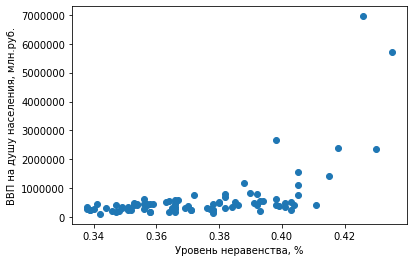

In [362]:
Grafik(1,0)

Корреляция присутствует. Зависимость, возможно: квадратичная, линейная, логарифмическая 

Коэффициент корреляции составляет - -0.1690268854924739


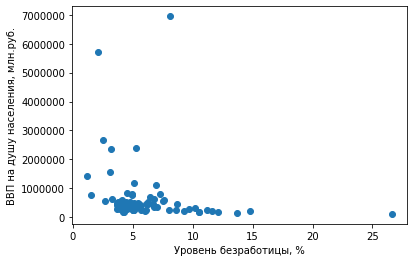

In [363]:
Grafik(2,0)

Корреляция присутствует. Зависимость, возможно: квадратичная, линейная, логарифмическая 

Коэффициент корреляции составляет - -0.5704902716581101


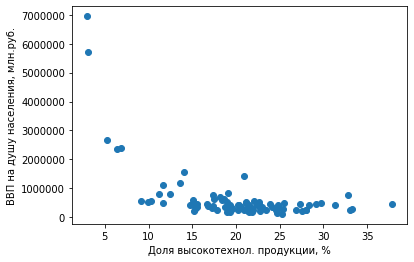

In [364]:
Grafik(3,0)

Корреляция присутствует. Зависимость, возможно: квадратичная, линейная

Коэффициент корреляции составляет - 0.17237658439872777


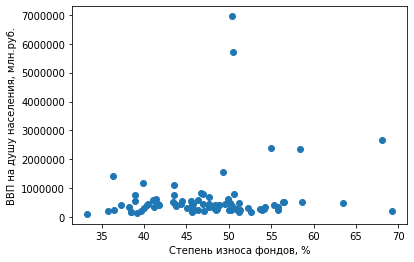

In [365]:
Grafik(4,0)

Корреляция присутствует. Зависимость, возможно: квадратичная, линейная

Даллее каждой переменной присваивается столбец из итоговой таблицы.
Y - ВВП на душу населения;
X0 - Матрица состоящая из единиц для оценки постоянного коэффициента;
X1 - Уровень неравенства;
X2 - Уровень безработицы;
X3 - Доля высокотехнол. продукции;
X4 - Степень износа фондов.

In [366]:
Itog_Table.columns = (['ВВП на душу населения, млн.руб.', 'Уровень неравенства, %', 
              'Уровень безработицы, %', 'Доля высокотехнол. продукции, %','Степень износа фондов, %'])

Y = Itog_Table['ВВП на душу населения, млн.руб.'].values.reshape(len(Itog_Table['ВВП на душу населения, млн.руб.']), 1)
X0 = np.ones((Y.shape[0],1)).astype(float)
X1 = Itog_Table['Уровень неравенства, %'].values.reshape( Y.shape[0], 1).astype(float)
X2 = Itog_Table['Уровень безработицы, %'].values.reshape( Y.shape[0], 1).astype(float)
X3 = Itog_Table['Доля высокотехнол. продукции, %'].values.reshape( Y.shape[0], 1).astype(float)
X4 = Itog_Table['Степень износа фондов, %'].values.reshape( Y.shape[0], 1).astype(float)

<h3>Обучение и проверка</h3>

Переменные в class MNK:

Переменным a,c,e,g можно присваивать значения np.log,np.exp и т.д. Таким, образом можно менять 
все элементы матрицы.

Переменные b,d,f,h это степень в которую можно возвести признак 

С помощью переменных n,m,w,v можно убрать некоторые признаки 

k - количество повторов цикла

p - задаем процент обучающих данных 

С помощью функции def Regular можно считать ошибки с регуляризацией 

Переменными L1, L2 можно регулировать регуляризацию

С помощью функции def Non_stand_err можно считать не стандартную ошибку(не квадратичную) 

С помщью переменных vv,ff,oo,nn можно регулировать степени ошибок 


In [367]:
class MNK:
    Spicok=[]
    Spicok1=[]
    Spicok2=[]
    Spicok3=[]
    def __init__(self, a=np.array, b=1, c=np.array, d=1,
                 e=np.array, f=1, g=np.array, h=1, n=1, m=1, w=1, v=1, k=1, p=0.75,L1=0,L2=0,vv=1,ff=1,oo=1,nn=1):
        #присваиваем значения по умолчанию 
        self.sum1 = 0.
        self.sum2 = 0.
        self.data = []
        self.erorLIN = []
        self.erorSQR = []
        self.erorLIN1 = []
        self.erorSQR1 = []
        self.erorLIN2 = []
        self.erorSQR2 = []
        self.erorLIN3 = []
        self.erorSQR3 = []
        self.test_error = []
        self.sum3 = 0.
        self.sum4 = 0.
        self.erorSQR4 = []
        self.erorSQR5 = []
        self.sum5 = 0.
        self.sum6 = 0.
        self.erorSQR6 = 0.
        self.sum6=0
    def MNK_koef(self,a,b,c,d,e,f,g,h,n,m,w,v,k,p):
        self.a=a
        self.b=b
        self.c=c
        self.d=d
        self.e=e
        self.f=f
        self.g=g
        self.h=h
        self.n=n
        self.m=m
        self.w=w
        self.v=v
        #Далее считаем коэффициенты с помощью МНК 
        self.Matrix = np.concatenate([X0, (self.n*self.a(X1)**self.b), (self.m*self.c(X2)**self.d), 
                                      (self.w*self.e(X3)**self.f), (self.v*self.g(X4)**self.h)],
                                     axis=1)
        self.Matrix = self.Matrix.astype(float)
        self.Matrix_obr = np.linalg.pinv( self.Matrix )
        self.Koef = self.Matrix_obr.dot( Y )
        self.Koef = self.Koef.reshape( self.Koef.shape[0] )
        print("*"*60)
        print('Коэффициент перед переменной X0 =', self.Koef[0])
        print('Коэффициент перед переменной X1 =', self.Koef[1])
        print('Коэффициент перед переменной X2 =', self.Koef[2])
        print('Коэффициент перед переменной X3 =', self.Koef[3])
        print('Коэффициент перед переменной X4 =', self.Koef[4])
        print("*"*60)
        print ("ПОЛНЫЙ НАБОР ДАННЫХ") 
        #Счиатем ошибку 
        for i in range(Y.shape[0]):
            self.err = (self.Koef[0]+self.Koef[1]*(self.n*self.a(X1)**self.b)[i]+
                        self.Koef[2]*(self.m*self.c(X2)**self.d)[i]+
                   self.Koef[3]*(self.w*self.e(X3)**self.f)[i]+
                        self.Koef[4]*(self.v*self.g(X4)**self.h)[i])-Y[i]
            self.sum1 += self.err
            self.sum2 += self.err * self.err
        print( "Ошибка                          =", self.sum1[0])
        print( "Средний квадрат ошибки          =", self.sum2[0]/Y.shape[0])
        #Далее заносим коэффициенты в отдельный список, для дальнейшего их сравнения 
        self.data.append( self.Koef[0]),self.data.append( self.Koef[1]),self.data.append( self.Koef[2])
        self.data.append( self.Koef[3]),self.data.append( self.Koef[4])
        
        for j in range(k):
            #Делим случайно данные на обучающие и тестовые 
            perm = np.random.permutation( Y.shape[0] )
            self.ii = perm[:int(Y.shape[0] * p)]
            self.jj = perm[int(Y.shape[0]*p):]
            #Далее всё как и выше, но только по обучающим данным 
            self.Matrix1 = np.concatenate([X0[self.ii], (self.n*self.a(X1)**self.b)[self.ii], 
                                          (self.m*self.c(X2)**self.d)[self.ii], 
                                      (self.w*self.e(X3)**self.f)[self.ii], (self.v*self.g(X4)**self.h)[self.ii]], axis=1)
            self.Matrix1 = self.Matrix1.astype(float)
            self.Matrix_obr1 = np.linalg.pinv( self.Matrix1 )
            self.Koef1 = self.Matrix_obr1.dot( Y[self.ii] )
            self.Koef1 = self.Koef1.reshape( self.Koef1.shape[0] )
            err1 = list(map (lambda x: ((((self.Koef1[0]+self.Koef1[1]*(self.n*self.a(X1)**self.b)[self.ii][x]+
                        self.Koef1[2]*(self.m*self.c(X2)**self.d)[self.ii][x]+
                   self.Koef1[3]*(self.w*self.e(X3)**self.f)[self.ii][x]+self.Koef1[4]
                                  *(self.v*self.g(X4)**self.h)[self.ii][x])-Y[self.ii][x]))), (range(Y[self.ii].shape[0]))))
            g=sum(err1)/Y[self.ii].shape[0]
            gg=sum(list(map(lambda x: x**2, err1)))/Y[self.ii].shape[0]
            self.erorLIN.append(g[0])
            self.erorSQR.append(gg[0])
            #Ошибка на тестовых данных 
            err2 = list(map (lambda x: ((((self.Koef1[0]+self.Koef1[1]*(self.n*self.a(X1)**self.b)[self.jj][x]+
                        self.Koef1[2]*(self.m*self.c(X2)**self.d)[self.jj][x]+
                   self.Koef1[3]*(self.w*self.e(X3)**self.f)[self.jj][x]+self.Koef1[4]
                                  *(self.v*self.g(X4)**self.h)[self.jj][x])-Y[self.jj][x]))), (range(Y[self.jj].shape[0]))))
            ggg=sum(err2)/Y[self.jj].shape[0]
            gggg=sum(list(map(lambda x: x**2, err2)))/Y[self.jj].shape[0]
            self.erorLIN1.append(ggg[0])
            self.erorSQR1.append(gggg[0]) 
            
            #ДОБАВЛЯЕМ ОПТИМАЙЗ
            z=opt.minimize( self.optim, (0,0,0,0,0), method = 'powell' )
            err3 = list(map (lambda x: ((((z.x[0]+z.x[1]*(self.n*self.a(X1)**self.b)[self.ii][x]
                                           +z.x[2]*(self.m*self.c(X2)**self.d)[self.ii][x]+
                   z.x[3]*(self.w*self.e(X3)**self.f)[self.ii][x]+z.x[4]*(self.v*self.g(X4)**self.h)[self.ii][x])
                                          -Y[self.ii][x]))), (range(Y[self.ii].shape[0]))))
            ggggg=sum(err1)/Y[self.ii].shape[0]
            gggggg=sum(list(map(lambda x: x**2, err1)))/Y[self.ii].shape[0]
            self.erorLIN2.append(ggggg[0])
            self.erorSQR2.append(gggggg[0])
            #Ошибка на тестовых данных 
            err4 = list(map (lambda x: ((((z.x[0]+z.x[1]*(self.n*self.a(X1)**self.b)[self.jj][x]
                                           +z.x[2]*(self.m*self.c(X2)**self.d)[self.jj][x]+
                        z.x[3]*(self.w*self.e(X3)**self.f)[self.jj][x]
                                           +z.x[4]*(self.v*self.g(X4)**self.h)[self.jj][x])
                                          -Y[self.jj][x]))), (range(Y[self.jj].shape[0]))))
            ggggggg=sum(err2)/Y[self.jj].shape[0]
            gggggggg=sum(list(map(lambda x: x**2, err2)))/Y[self.jj].shape[0]
            self.erorLIN3.append(ggggggg[0])
            self.erorSQR3.append(gggggggg[0]) 
            
        
        print("*************************МНК********************************")
        print("*"*60)
        print ("ОБУЧАЮЩИЕ ДАННЫЕ")
        print ("Ошибка                          =", sum(self.erorLIN)/k)
        print ("Средний квадрат ошибки          =", sum(self.erorSQR)/k)
        print("*"*60)
        print ("ТЕСТОВЫЕ ДАННЫЕ")
        print ("Ошибка                          =", sum(self.erorLIN1)/k)
        print ("Средний квадрат ошибки          =", sum(self.erorSQR1)/k)
        print("*"*60)
        print("******************ФУНКЦИЯ МИНИМУМА**************************")
        print("*"*60)
        print ("ОБУЧАЮЩИЕ ДАННЫЕ")
        print ("Ошибка                          =", sum(self.erorLIN2)/k)
        print ("Средний квадрат ошибки          =", sum(self.erorSQR2)/k)
        print("*"*60)
        print ("ТЕСТОВЫЕ ДАННЫЕ")
        print ("Ошибка                          =", sum(self.erorLIN3)/k)
        print ("Средний квадрат ошибки          =", sum(self.erorSQR3)/k)
        print("*"*60)
        self.test_error.append(sum(self.erorSQR1)/k)
        self.Spicok.append(sum(self.erorSQR1)/k)
        self.Spicok1.append(sum(self.erorSQR3)/k)
        
    def optim(self,Koeff ):
        err = list(map (lambda x: ((((Koeff[0]+Koeff[1]*(self.a(X1)**self.b)[self.ii][x]+Koeff[2]*(self.c(X2)**self.d)[self.ii][x]+
                Koeff[3]*(self.e(X3)**self.f)[self.ii][x]+Koeff[4]*(self.g(X4)**self.h)[self.ii][x])-Y[self.ii][x]))**2), (range(Y[self.ii].shape[0]))))
        return np.mean( err )
       
        
    def Regular(self,a,b,c,d,e,f,g,h,n,m,w,v,k,p,L1,L2):
        self.L1=L1
        self.L2=L2

        for j in range(k):
            #Делим случайно данные на обучающие и тестовые 
            perm = np.random.permutation( Y.shape[0] )
            self.ii = perm[:int(Y.shape[0] * p)]
            self.jj = perm[int(Y.shape[0]*p):]
            #ДОБАВЛЯЕМ ОПТИМАЙЗ
            z=opt.minimize( self.optim1, (0,0,0,0,0), method = 'powell' )
            err5 = list(map(lambda x:((z.x[0]+z.x[1]*(self.a(X1)**self.b)[self.ii][x]
            +z.x[2]*(self.c(X2)**self.d)[self.ii][x]
            +z.x[3]*(self.e(X3)**self.f)[self.ii][x]+z.x[4]*(self.g(X4)**self.h)[self.ii][x])-Y[self.ii][x])**2
            +self.L1*((np.abs(z.x[1])+np.abs(z.x[2])+np.abs(z.x[3])
            +np.abs(z.x[4])))+self.L2*(((z.x[1])**2+(z.x[2])**2+(z.x[3])**2+(z.x[4])**2)), range(self.ii.shape[0])))
            ggggg1=sum(err5)/Y[self.ii].shape[0]
            self.erorSQR4.append(ggggg1[0])
            #Ошибка на тестовых данных 
            err6 = list(map(lambda x:((z.x[0]+z.x[1]*(self.a(X1)**self.b)[self.jj][x]
            +z.x[2]*(self.c(X2)**self.d)[self.jj][x]
            +z.x[3]*(self.e(X3)**self.f)[self.jj][x]+z.x[4]*(self.g(X4)**self.h)[self.jj][x])-Y[self.ii][x])**2
            +self.L1*((np.abs(z.x[1])+np.abs(z.x[2])+np.abs(z.x[3])
            +np.abs(z.x[4])))+self.L2*(((z.x[1])**2+(z.x[2])**2+(z.x[3])**2+(z.x[4])**2)), range(self.jj.shape[0])))
            gggggggg1=sum(err6)/Y[self.jj].shape[0]
            self.erorSQR5.append(gggggggg1[0])

        print("******************ФУНКЦИЯ МИНИМУМА**************************")
        print("*"*60)
        print ("ОБУЧАЮЩИЕ ДАННЫЕ")
        print ("Ошибка                          =", sum(self.erorSQR4)/k)
        print("*"*60)
        print ("ТЕСТОВЫЕ ДАННЫЕ")
        print ("Ошибка                          =", sum(self.erorSQR5)/k)
        print("*"*60)
        self.Spicok2.append(sum(self.erorSQR5)/k)
        #  Далее конструктор для рассчета opt.minimize
    def optim1(self,Koeff ):
        self.err = list(map(lambda x:((Koeff[0]+Koeff[1]*(self.a(X1)**self.b)[self.ii][x]
        +Koeff[2]*(self.c(X2)**self.d)[self.ii][x]
        +Koeff[3]*(self.e(X3)**self.f)[self.ii][x]+Koeff[4]*(self.g(X4)**self.h)[self.ii][x])-Y[self.ii][x])**2
        +self.L1*((np.abs(Koeff[1])+np.abs(Koeff[2])+np.abs(Koeff[3])
        +np.abs(Koeff[4])))+self.L2*(((Koeff[1])**2+(Koeff[2])**2+(Koeff[3])**2+(Koeff[4])**2)), range(self.ii.shape[0])))
        return np.mean(self.err)       
  

    def Non_stand_err(self,a,b,c,d,e,f,g,h,n,m,w,v,k,p,vv,ff,oo,nn):
        self.vv=vv
        self.ff=ff
        self.oo=oo
        self.nn=nn
        for j in range(k):
            #Делим случайно данные на обучающие и тестовые 
            perm = np.random.permutation( Y.shape[0] )
            self.ii = perm[:int(Y.shape[0] * p)]
            self.jj = perm[int(Y.shape[0]*p):]
            #ДОБАВЛЯЕМ ОПТИМАЙЗ
            z=opt.minimize( self.optim2, (0,0,0,0,0), method = 'CG' )
            #Ошибка на тестовых данных 
            for i in range(self.jj.shape[0]):
                err7 = ((z.x[0]+z.x[1]*(self.a(X1)**self.b)[self.jj][i]
                                      +z.x[2]*(self.c(X2)**self.d)[self.jj][i]
                    +z.x[3]*(self.e(X3)**self.f)[self.ii][i]+z.x[4]*(self.g(X4)**self.h)[self.jj][i])-Y[self.jj][i])
                self.sum6+= (int(err7[0]<0)*err7[0])**self.vv+(int(err7[0]<0)*err7[0])*self.ff
                +(int(err7[0]>=0)*err7[0])**self.oo +(int(err7[0]>=0)*err7[0])*self.nn
            gggggggg2=self.sum2/Y[self.jj].shape[0]
            self.erorSQR6+=gggggggg2

        print("******************ФУНКЦИЯ МИНИМУМА**************************")
        print("*"*60)
        print ("ТЕСТОВЫЕ ДАННЫЕ")
        print ("Ошибка                          =", sum(self.erorSQR6)/k)
        print("*"*60)
        self.Spicok3.append(self.erorSQR6/k)
        #  Далее конструктор для рассчета opt.minimize
    def optim2(self,Koeff ):
        for i in range(self.ii.shape[0]):
            self.err = ((Koeff[0]+Koeff[1]*(self.a(X1)**self.b)[self.ii][i]
                                      +Koeff[2]*(self.c(X2)**self.d)[self.ii][i]
                    +Koeff[3]*(self.e(X3)**self.f)[self.ii][i]+Koeff[4]*(self.g(X4)**self.h)[self.ii][i])-Y[self.ii][i])
            self.sum6+= (int(self.err<0)*self.err)**self.vv+(int(self.err[0]<0)*self.err)*self.ff
            +(int(self.err>=0)*self.err)**self.oo +(int(self.err>=0)*self.err)*self.nn
        return (self.sum6/self.ii.shape[0])

# Обычные модели 

# Модель 1

In [368]:
Model_1=MNK()
Model_1.MNK_koef(np.array, 1, np.array, 1, np.array, 1, np.array, 1, 1, 1, 1, 1, 10, 0.75)

************************************************************
Коэффициент перед переменной X0 = -5364478.310255796
Коэффициент перед переменной X1 = 16623600.656218933
Коэффициент перед переменной X2 = 2707.125818185639
Коэффициент перед переменной X3 = -56167.28718356168
Коэффициент перед переменной X4 = 18970.459605793174
************************************************************
ПОЛНЫЙ НАБОР ДАННЫХ
Ошибка                          = 9.708513971418142e-06
Средний квадрат ошибки          = 527074762603.1389
*************************МНК********************************
************************************************************
ОБУЧАЮЩИЕ ДАННЫЕ
Ошибка                          = -1.7837513811313142e-09
Средний квадрат ошибки          = 550582990273.5544
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = 28253.11817843942
Средний квадрат ошибки          = 508590068913.1917
********************************************************

# Модель 2

In [369]:
Model_1.MNK_koef(np.array, 2, np.array, 2, np.array, 2, np.array, 2, 1, 1, 1, 1, 10, 0.75)

************************************************************
Коэффициент перед переменной X0 = -3676157.997256948
Коэффициент перед переменной X1 = 28790272.215116292
Коэффициент перед переменной X2 = 762.0902186331344
Коэффициент перед переменной X3 = -746.925936275417
Коэффициент перед переменной X4 = 250.02885590192773
************************************************************
ПОЛНЫЙ НАБОР ДАННЫХ
Ошибка                          = -0.0016784649342298508
Средний квадрат ошибки          = 1107566774199.291
*************************МНК********************************
************************************************************
ОБУЧАЮЩИЕ ДАННЫЕ
Ошибка                          = 1.4784745424269487e-05
Средний квадрат ошибки          = 1149424380865.2124
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = 39476.91141156519
Средний квадрат ошибки          = 1104997644891.8743
*******************************************************

# Модель 3

In [370]:
Model_1.MNK_koef(np.array, 3, np.array, 3, np.array, 1, np.exp, 1, 0, 1, 1, 0, 10, 0.75)

************************************************************
Коэффициент перед переменной X0 = 2344569.6328241606
Коэффициент перед переменной X1 = 1.6128504217606326e-07
Коэффициент перед переменной X2 = -16.4125161579679
Коэффициент перед переменной X3 = -84395.77766484905
Коэффициент перед переменной X4 = 0.0
************************************************************
ПОЛНЫЙ НАБОР ДАННЫХ
Ошибка                          = -0.0016785386833362281
Средний квадрат ошибки          = 1762479604471.0962
*************************МНК********************************
************************************************************
ОБУЧАЮЩИЕ ДАННЫЕ
Ошибка                          = 1.472129101435153e-05
Средний квадрат ошибки          = 1839076691958.7798
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = 67141.99702292748
Средний квадрат ошибки          = 1730610828828.9487
************************************************************
****

# Модель 4

In [371]:
Model_1.MNK_koef(np.array, 2, np.log, 1, np.array, 2, np.array, 3, 1, 1, 0, 1, 10, 0.75)

************************************************************
Коэффициент перед переменной X0 = -4222938.571432195
Коэффициент перед переменной X1 = 32149549.91662282
Коэффициент перед переменной X2 = 7575.088553603186
Коэффициент перед переменной X3 = 0.0
Коэффициент перед переменной X4 = 3.007354651677846
************************************************************
ПОЛНЫЙ НАБОР ДАННЫХ
Ошибка                          = 0.026105839351657778
Средний квадрат ошибки          = 2382817458422.6655
*************************МНК********************************
************************************************************
ОБУЧАЮЩИЕ ДАННЫЕ
Ошибка                          = 0.0006829787301830948
Средний квадрат ошибки          = 2413380046806.9634
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = 31808.47414954005
Средний квадрат ошибки          = 2556884775353.082
************************************************************
*************

# Модель 5

In [372]:
Model_1.MNK_koef(np.array, 1, np.array, 1, np.array, 4, np.exp, 1, 1, 0, 1, 1, 10, 0.75)

************************************************************
Коэффициент перед переменной X0 = 5.039753618332595e-53
Коэффициент перед переменной X1 = 0.0
Коэффициент перед переменной X2 = 0.0
Коэффициент перед переменной X3 = 1.3466779809196426e-47
Коэффициент перед переменной X4 = 8.749108928269599e-25
************************************************************
ПОЛНЫЙ НАБОР ДАННЫХ
Ошибка                          = -55061100.95731234
Средний квадрат ошибки          = 3762884325476.7803
*************************МНК********************************
************************************************************
ОБУЧАЮЩИЕ ДАННЫЕ
Ошибка                          = -602791.890202198
Средний квадрат ошибки          = 3573203352339.9014
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = -570543.5852068303
Средний квадрат ошибки          = 5352604136943.604
************************************************************
******************ФУ

# Модель 6

In [373]:
Model_1.MNK_koef(np.log, 1, np.array, 3, np.array, 1, np.array, 1, 1, 1, 1, 0, 10, 0.75)

************************************************************
Коэффициент перед переменной X0 = 7619315.365833677
Коэффициент перед переменной X1 = 5845154.331481783
Коэффициент перед переменной X2 = 10.111061708815406
Коэффициент перед переменной X3 = -60849.97442642573
Коэффициент перед переменной X4 = 0.0
************************************************************
ПОЛНЫЙ НАБОР ДАННЫХ
Ошибка                          = -55061100.95732556
Средний квадрат ошибки          = 4315968863933.533
*************************МНК********************************
************************************************************
ОБУЧАЮЩИЕ ДАННЫЕ
Ошибка                          = -602791.8902021156
Средний квадрат ошибки          = 4171987092942.3154
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = -614036.1795356817
Средний квадрат ошибки          = 5909802023562.673
************************************************************
*****************

# Модель 7 

In [374]:
Model_1.MNK_koef(np.array, 1, np.array, 1, np.array, 1, np.array, 1, 0, 1, 1, 1, 10, 0.75)

************************************************************
Коэффициент перед переменной X0 = 2045614.8327203635
Коэффициент перед переменной X1 = -2.0415767133668315e-08
Коэффициент перед переменной X2 = -34402.75614477205
Коэффициент перед переменной X3 = -82832.9579761498
Коэффициент перед переменной X4 = 9764.116654366851
************************************************************
ПОЛНЫЙ НАБОР ДАННЫХ
Ошибка                          = -55061100.95732559
Средний квадрат ошибки          = 4949117264427.817
*************************МНК********************************
************************************************************
ОБУЧАЮЩИЕ ДАННЫЕ
Ошибка                          = -602791.8902021152
Средний квадрат ошибки          = 4711246868275.5625
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = -681925.5249756565
Средний квадрат ошибки          = 6994751460444.842
**********************************************************

# Модель 8 

In [375]:
Model_1.MNK_koef(np.array, 2, np.exp, 1, np.array, 2, np.log, 1, 1, 1, 1, 1, 10, 0.75)

************************************************************
Коэффициент перед переменной X0 = -7861002.932357026
Коэффициент перед переменной X1 = 28702158.056363255
Коэффициент перед переменной X2 = 2.039555512634693e-06
Коэффициент перед переменной X3 = -760.73873622419
Коэффициент перед переменной X4 = 1248093.356831567
************************************************************
ПОЛНЫЙ НАБОР ДАННЫХ
Ошибка                          = -55058878.950497255
Средний квадрат ошибки          = 5525460478730.076
*************************МНК********************************
************************************************************
ОБУЧАЮЩИЕ ДАННЫЕ
Ошибка                          = -602790.0952844045
Средний квадрат ошибки          = 5259931843233.647
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = 693502061.6437078
Средний квадрат ошибки          = 5.925566895089254e+19
**********************************************************

# Модели с регуляризацией 

# Модель 1

In [376]:
Model_1.Regular(a=np.array, b=1, c=np.array, d=1, e=np.array, f=1, g=np.array, h=1, n=1, m=1, w=1, v=1, k=10, p=0.75, L1=1, L2=0)

******************ФУНКЦИЯ МИНИМУМА**************************
************************************************************
ОБУЧАЮЩИЕ ДАННЫЕ
Ошибка                          = 570591556198.9475
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = 7.604695526335318e+19
************************************************************


# Модель 2

In [377]:
Model_1.Regular(a=np.array, b=1, c=np.array, d=1, e=np.array, f=1, g=np.array, h=1, n=1, m=1, w=1, v=1, k=10, p=0.75, L1=1, L2=1)

******************ФУНКЦИЯ МИНИМУМА**************************
************************************************************
ОБУЧАЮЩИЕ ДАННЫЕ
Ошибка                          = 1342404625415.4097
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = 7.884569469759773e+19
************************************************************


# Модель 3

In [378]:
Model_1.Regular(a=np.array, b=1, c=np.array, d=1, e=np.array, f=1, g=np.array, h=1, n=1, m=1, w=1, v=1, k=10, p=0.75, L1=0, L2=1)

******************ФУНКЦИЯ МИНИМУМА**************************
************************************************************
ОБУЧАЮЩИЕ ДАННЫЕ
Ошибка                          = 2006429678782.7417
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = 7.884569634233513e+19
************************************************************


# Модель 4

In [379]:
Model_1.Regular(a=np.array, b=2, c=np.array, d=3, e=np.array, f=2, g=np.array, h=1, n=1, m=1, w=1, v=1, k=10, p=0.75, L1=1, L2=0)

******************ФУНКЦИЯ МИНИМУМА**************************
************************************************************
ОБУЧАЮЩИЕ ДАННЫЕ
Ошибка                          = 2622583850469.7944
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = 1.564317863144069e+20
************************************************************


# Модели с нестандартными моделями 

# Модель 1

In [380]:
Model_1.Non_stand_err(a=np.array, b=1, c=np.array, d=1, e=np.array, f=1, g=np.array, 
                                      h=1, n=1, m=1, w=1, v=1, k=10, p=0.75, vv=5,ff=2,oo=6,nn=2)

******************ФУНКЦИЯ МИНИМУМА**************************
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = 21850684620432.57
************************************************************


# Модель 2

In [381]:
Model_1.Non_stand_err(a=np.array, b=1, c=np.array, d=1, e=np.array, f=1, g=np.array, 
                h=1, n=1, m=1, w=1, v=1, k=10, p=0.75, vv=2,ff=3,oo=1,nn=4)

******************ФУНКЦИЯ МИНИМУМА**************************
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = 43701369240865.14
************************************************************


# Модель 3

In [382]:
Model_1.Non_stand_err(a=np.array, b=1, c=np.array, d=1, e=np.array, f=1, g=np.array, 
                h=1, n=1, m=1, w=1, v=1, k=10, p=0.75, vv=5,ff=2,oo=6,nn=2)

******************ФУНКЦИЯ МИНИМУМА**************************
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = 65552053861297.73
************************************************************


# Модель 4

In [383]:
Model_1.Non_stand_err(a=np.array, b=1, c=np.array, d=1, e=np.array, f=1, g=np.array, 
                h=1, n=1, m=1, w=1, v=1, k=10, p=0.75, vv=2,ff=1,oo=1,nn=4)

******************ФУНКЦИЯ МИНИМУМА**************************
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = 87402738481730.34
************************************************************


# Модель 5

In [384]:
Model_1.Non_stand_err(a=np.array, b=1, c=np.array, d=1, e=np.array, f=1, g=np.array, 
                h=1, n=1, m=1, w=1, v=1, k=10, p=0.75, vv=5,ff=1,oo=7,nn=5)

******************ФУНКЦИЯ МИНИМУМА**************************
************************************************************
ТЕСТОВЫЕ ДАННЫЕ
Ошибка                          = 109253423102162.97
************************************************************


# Выбор лучшей модели 

Подается список с тестовыми квадратами средних ошибок. 

В переменную Nomer присваивается значения от 1 до количество элементов в MNK.Spicok предполагается что в MNK.Spicok будет столько ошибок, сколько моделей протестировалось.

В переменной LL каждой ошибке присваивается табильный номер. Например, номер 1 означет - модель первая.

Далее создается словать Slovar.

Далее отсортировываем ошибки по убыванию, каждой ошибки присваиваем табельный номеp (присваивание табельного номера, скорее излишне, но пусть будет).

Дальше мы меняем местами ключи и элементы из изначально созданного словаря Slovar. Это делается для того, чтобы после того, как мы заданим в ключ наименьшую ошибку из всех, нам выдало номер наилучшей модели. 

# Лучшая модель по методу МНК

In [385]:
from copy import deepcopy
Nomer=range(1,len(MNK.Spicok)+1)
Spicok_copy=deepcopy(MNK.Spicok)
#Копировать пришлось из за того, что последующая сортировка в MNK.Spicok привела к сортировке в других кодых 
#где находится переменная MNK.Spicok
LL=list(zip(Nomer,MNK.Spicok))
Slovar = dict(LL)
xx = list( Slovar.items() )
Spicok_copy.sort()
lychaya_model=list(zip(Nomer, Spicok_copy))
Model=dict()
list(map( lambda x: Model.setdefault(x[1],x[0]), xx))
CAR=Model[lychaya_model[0][1]]
f'НАИЛУЧШАЯ МОДЕЛЬ С ТОЧКИ ЗРЕНИЯ МАШИННОГО ОБУЧЕНИЯ ПОД НОМЕРОМ {CAR}.'

'НАИЛУЧШАЯ МОДЕЛЬ С ТОЧКИ ЗРЕНИЯ МАШИННОГО ОБУЧЕНИЯ ПОД НОМЕРОМ 1.'

# Лучшая модель методом Оптимума 

In [386]:
Nomer1=range(1,len(MNK.Spicok1)+1)
Spicok1_copy=deepcopy(MNK.Spicok1)
#Копировать пришлось из за того, что последующая сортировка в MNK.Spicok привела к сортировке в других кодых 
#где находится переменная MNK.Spicok
LL1=list(zip(Nomer1,MNK.Spicok1))
Slovar1 = dict(LL1)
xx1 = list( Slovar1.items() )
Spicok1_copy.sort()
lychaya_model1=list(zip(Nomer1, Spicok1_copy))
Model1=dict()
list(map( lambda x: Model1.setdefault(x[1],x[0]), xx1))
CAR1=Model[lychaya_model1[0][1]]
f'НАИЛУЧШАЯ МОДЕЛЬ С ТОЧКИ ЗРЕНИЯ МАШИННОГО ОБУЧЕНИЯ ПОД НОМЕРОМ {CAR1}.'

'НАИЛУЧШАЯ МОДЕЛЬ С ТОЧКИ ЗРЕНИЯ МАШИННОГО ОБУЧЕНИЯ ПОД НОМЕРОМ 1.'

# Лучшая модель (Регуляризация)

In [387]:
Nomer2=range(1,len(MNK.Spicok2)+1)
Spicok2_copy=deepcopy(MNK.Spicok2)
#Копировать пришлось из за того, что последующая сортировка в MNK.Spicok привела к сортировке в других кодых 
#где находится переменная MNK.Spicok
LL2=list(zip(Nomer2,MNK.Spicok2))
Slovar2 = dict(LL2)
xx2 = list( Slovar2.items() )
Spicok2_copy.sort()
lychaya_model2=list(zip(Nomer2, Spicok2_copy))
Model2=dict()
list(map( lambda x: Model2.setdefault(x[1],x[0]), xx2))
CAR2=Model2[lychaya_model2[0][1]]
f'НАИЛУЧШАЯ МОДЕЛЬ С ТОЧКИ ЗРЕНИЯ МАШИННОГО ОБУЧЕНИЯ ПОД НОМЕРОМ {CAR2}.'

'НАИЛУЧШАЯ МОДЕЛЬ С ТОЧКИ ЗРЕНИЯ МАШИННОГО ОБУЧЕНИЯ ПОД НОМЕРОМ 1.'

# Лучшая модель (Нестандартные ошибки)

In [388]:
Spicok3=list(map(lambda x: MNK.Spicok3[x][0],range(len(MNK.Spicok3))))

In [389]:
Nomer3=range(1,len(Spicok3)+1)
Spicok3_copy=deepcopy(Spicok3)
#Копировать пришлось из за того, что последующая сортировка в MNK.Spicok привела к сортировке в других кодых 
#где находится переменная MNK.Spicok
LL3=list(zip(Nomer3,Spicok3))
Slovar3 = dict(LL3)
xx3 = list( Slovar3.items() )
Spicok3_copy.sort()
lychaya_model3=list(zip(Nomer3, Spicok3_copy))
Model3=dict()
list(map( lambda x: Model3.setdefault(x[1],x[0]), xx3))
CAR3=Model3[lychaya_model3[0][1]]
f'НАИЛУЧШАЯ МОДЕЛЬ С ТОЧКИ ЗРЕНИЯ МАШИННОГО ОБУЧЕНИЯ ПОД НОМЕРОМ {CAR3}.'

'НАИЛУЧШАЯ МОДЕЛЬ С ТОЧКИ ЗРЕНИЯ МАШИННОГО ОБУЧЕНИЯ ПОД НОМЕРОМ 1.'

# Лучшая модель из 4-х классов 

In [394]:
Luch=[lychaya_model[0][1]]+[lychaya_model1[0][1]]+[lychaya_model2[0][1]]+[lychaya_model3[0][1]]
Nomer4=("Лучшая модель по методу МНК","Лучшая модель методом Оптимума","Лучшая модель (Регуляризация)","Лучшая модель (Нестандартные ошибки)")
Luch_copy=deepcopy(Luch)
Luch_copy.sort()
LL4=list(zip(Luch,Nomer4))
Slovar4 = dict(LL4)
CAR4=Slovar4[Luch_copy[0]]
CAR4
f'ЛУЧШАЯ МОДЕЛЬ ЭТО МОДЕЛЬ ИЗ КЛАССА {CAR4}.'

'ЛУЧШАЯ МОДЕЛЬ ЭТО МОДЕЛЬ ИЗ КЛАССА Лучшая модель методом Оптимума.'